# Reading SM product from NSIDC

In [1]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import seaborn as sns

%matplotlib notebook

In [2]:
dir = "/Users/brodzik/SPL3SMP.004"
%cd $dir
%ls

/Users/brodzik/SPL3SMP.004
SMAP_L3_SM_P_20150415_R14010_001.h5


In [3]:
file = "SMAP_L3_SM_P_20150415_R14010_001.h5"
f = Dataset(file, "r", 'HDF5')
#f.groups
lats = f.groups['Soil_Moisture_Retrieval_Data_AM'].variables['latitude'][:]
lons = f.groups['Soil_Moisture_Retrieval_Data_AM'].variables['longitude'][:]
lats_pm = f.groups['Soil_Moisture_Retrieval_Data_PM'].variables['latitude_pm'][:]
lons_pm = f.groups['Soil_Moisture_Retrieval_Data_PM'].variables['longitude_pm'][:]

In [4]:
f.groups['Soil_Moisture_Retrieval_Data_AM'].variables['latitude']

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(phony_dim_0, phony_dim_1)
    long_name: Latitude of the center of the Earth based grid cell.
    units: degrees_north
path = /Soil_Moisture_Retrieval_Data_AM
unlimited dimensions: 
current shape = (406, 964)
filling off

In [5]:
f.groups['Soil_Moisture_Retrieval_Data_PM'].variables['latitude_pm']

<class 'netCDF4._netCDF4.Variable'>
float32 latitude_pm(phony_dim_3, phony_dim_4)
    long_name: Latitude of the center of the Earth based grid cell.
    coordinates: /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Retrieval_Data_AM/longitude
    valid_min: -90.0
    valid_max: 90.0
    _FillValue: -9999.0
    units: degrees_north
path = /Soil_Moisture_Retrieval_Data_PM
unlimited dimensions: 
current shape = (406, 964)
filling off

In [6]:
lats.shape, lons.shape, lats_pm.shape, lons_pm.shape


((406, 964), (406, 964), (406, 964), (406, 964))

In [7]:
np.min(lats), np.max(lats), np.min(lons), np.max(lons)
np.min(lats_pm), np.max(lats_pm), np.min(lons_pm), np.max(lons_pm)

(-83.631973, 83.631973, -179.81328, 179.81328)

# Look at the AM latitudes in the left-most column

In [8]:
lats[:,0]

masked_array(data = [83.63197326660156 81.48033142089844 79.76895904541016 78.302978515625
 76.99910736083984 75.81256866455078 74.71601104736328 73.6912612915039
 72.72552490234375 71.80941009521484 70.93574523925781 70.09893035888672
 69.29449462890625 68.51880645751953 67.76883697509766 67.04206085205078
 66.33634948730469 65.64984893798828 64.98098754882812 64.32837677001953
 63.6908073425293 63.06719970703125 62.45660400390625 61.8581657409668
 61.2711296081543 60.694801330566406 60.12855529785156 59.57182693481445
 59.02409744262695 58.484893798828125 57.95378875732422 57.43037033081055
 56.91427993774414 56.40517044067383 55.90272903442383 55.40665817260742
 54.91668701171875 54.432559967041016 53.95403289794922 53.48088836669922
 53.01291275024414 52.54990768432617 52.09169387817383 51.63808822631836
 51.18893051147461 50.74406051635742 50.3033332824707 49.86661148071289
 49.43375778198242 49.0046501159668 48.57916259765625 48.157188415527344
 47.738616943359375 47.323341369628

# Look at the leftmost column in the PM group

In [9]:
lats_pm[:,0]

masked_array(data = [83.63197326660156 81.48033142089844 79.76895904541016 78.302978515625
 76.99910736083984 75.81256866455078 74.71601104736328 73.6912612915039
 72.72552490234375 71.80941009521484 70.93574523925781 70.09893035888672
 69.29449462890625 68.51880645751953 67.76883697509766 67.04206085205078
 66.33634948730469 65.64984893798828 64.98098754882812 64.32837677001953
 63.6908073425293 63.06719970703125 62.45660400390625 61.8581657409668
 61.2711296081543 60.694801330566406 60.12855529785156 59.57182693481445
 59.02409744262695 58.484893798828125 57.95378875732422 57.43037033081055
 56.91427993774414 56.40517044067383 55.90272903442383 55.40665817260742
 54.91668701171875 54.432559967041016 53.95403289794922 53.48088836669922
 53.01291275024414 52.54990768432617 52.09169387817383 51.63808822631836
 51.18893051147461 50.74406051635742 50.3033332824707 49.86661148071289
 49.43375778198242 49.0046501159668 48.57916259765625 48.157188415527344
 47.738616943359375 47.323341369628

(-0.5, 963.5, 405.5, -0.5)

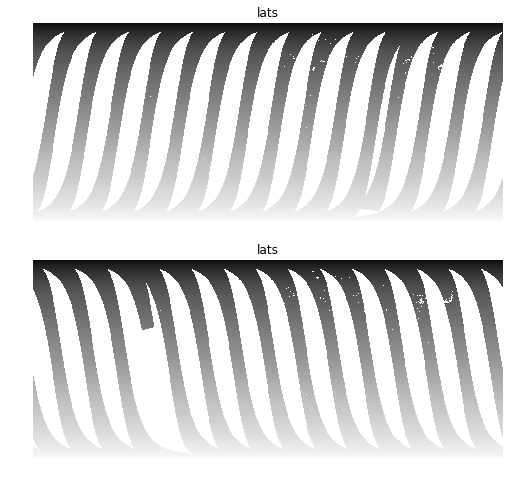

In [11]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].imshow(lats, cmap='Greys', vmin=np.amin(-90.), vmax=np.amax(90.), interpolation='None')
axes[0].set_title("lats")
axes[0].axis('off')
axes[1].imshow(lats_pm, cmap='Greys', vmin=np.amin(-90.), vmax=np.amax(90.), interpolation='None')
axes[1].set_title("lats")
axes[1].axis('off')
